## Exploring Maritime Piracy Incidents

National Geospatial-Intelligence Agency’s Maritime Safety Information portal provides a shapefile of all incidencts of maritine piracy in the form on Anti-shipping Activity Messages. 

This notebook demonstrates how to read the shapefile via geopandas and explore the trends of pirate incidents over the years.

Download [ASAM_shp.zip](https://msi.nga.mil/api/publications/download?key=16920958/SFH00000/ASAM_shp.zip&type=download)

In [34]:
import geopandas as gpd
import pandas as pd
import os

In [33]:
file_path = 'ASAM_events.shp'
gdf = gpd.read_file(file_path)

In [54]:
gdf

,reference,dateofocc,subreg,hostility_,victim_d,descriptio,hostilityt,hostilit_D,victim_l,victim_l_D,navarea,geometry
0,1990-9,1990-06-03,26,CUBAN GUNBOAT,BELESBAT QUEEN,A CUBAN GUNBOAT COMMANDEERED LUXURY YACHT BELE...,2,Naval Engagement,11,Vessel,IV,POINT (-75.13333 21.93333)
1,1990-10,1990-03-20,71,PIRATES,RO/RO SEA DRAGON,20 MARCH 1990. BORNEO. ...,1,Pirate Assault,3,Cargo Ship,XI,POINT (108.00000 3.00000)
2,1990-11,1990-03-20,61,PIRATES,RO/RO SUNRISE,20 MARCH 1990. SINGAPORE. ...,1,Pirate Assault,3,Cargo Ship,VIII,POINT (90.00000 -1.00000)
3,1989-16,1989-01-01,62,PEOPLES DEMOCRATIC REPUBLIC OF YEMEN,U.S. MARINERS,"RED SEA, YEMEN ...",2,Naval Engagement,13,Other,IX,POINT (42.00000 14.00000)
4,1989-17,1989-09-23,63,PIRATES,LASH STONEWALL JACKSON,Indian ocean ...,1,Pirate Assault,11,Vessel,VIII,POINT (80.30000 13.10000)
...,...,...,...,...,...,...,...,...,...,...,...,...
8342,2020-138,2020-03-27,62,None,None,"On 27 March at 1226 UTC, two skiffs with 5-6 p...",3,Suspicious Approach,9,Tanker,IX,POINT (54.51667 26.01667)
8343,2020-13,2020-02-02,71,None,None,"On 20 January, a product tanker was boarded by...",9,Attempted Boarding,9,Tanker,XI,POINT (103.88333 1.05000)
8344,2020-208,2020-05-14,57,None,None,"On 14 May, individuals in two skiffs approache...",3,Suspicious Approach,5,Merchant Vessel,II,POINT (2.48333 4.56667)
8345,2021-132,2021-06-29,22,None,Tanker,"PERU: On 28 June, at 16:00 local time, robbers...",11,Robbery,1,Anchored Ship,XVI,POINT (-77.51667 -12.01667)


`dateofocc` field contains event dates. We use Pandas `to_datetime()` function to convert them to datetime objects

In [42]:
gdf['dateofocc'] = pd.to_datetime(gdf['dateofocc'])

Group values by year and calculate total piracy incidents for each year

In [60]:
counts = gdf.groupby(gdf.dateofocc.dt.year).size()
counts

dateofocc
1978      2
1979      2
1980      2
1981      1
1983      2
1984      8
1985     17
1986     29
1987     24
1988     28
1989     17
1990     21
1991     28
1992     37
1993    102
1994     94
1995     90
1996     48
1997     73
1998     67
1999    133
2000    424
2001    311
2002    374
2003    390
2004    346
2005    342
2006    298
2007    324
2008    500
2009    491
2010    545
2011    483
2012    345
2013    367
2014    291
2015    275
2016    321
2017    354
2018    162
2019    153
2020    316
2021    110
dtype: int64

Plot the trend of piracy incidents over time.

<AxesSubplot:xlabel='dateofocc'>

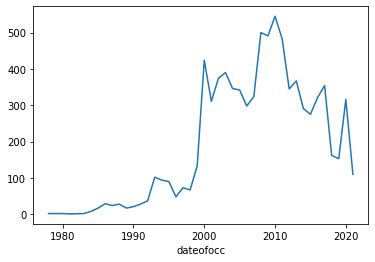

In [64]:
counts.plot()